## Análise de Convergência dos estados brasileiros considerando indicadores utilizados pelo Eurofound

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import csv
import json

In [2]:
!pip install --upgrade matplotlib --quiet

In [3]:
!pip install --upgrade seaborn --quiet

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import seaborn as sns

# Indicadores relacionados ao Índice de Desenvolvimento Humano

In [8]:
arquivo = "ADH_BASE_RADAR_2012-2021.xlsx"

caminho_completo = os.path.abspath(arquivo)
print("O caminho completo para o arquivo é:", caminho_completo)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx


In [9]:
df_mul_siafi_ibge = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx')

In [10]:
df_mul_siafi_ibge.head(11)

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
0,2012,BRASIL,NaN,NaN,0.746,0.825,0.687,0.732,0.606,0.731,...,39808859,10304212,10609288,150994845,10076087,23924348,140385557,116461209,15249133,84277753
1,2013,BRASIL,NaN,NaN,0.753,0.830,0.698,0.737,0.615,0.744,...,39055262,9986737,10521249,153338252,10336071,24034903,142817003,118782100,15820311,86108710
2,2014,BRASIL,NaN,NaN,0.762,0.835,0.715,0.741,0.630,0.761,...,38765780,9687655,10446675,155356978,10224771,23840076,144910303,121070227,16425141,87308460
3,2015,BRASIL,NaN,NaN,0.765,0.840,0.724,0.736,0.642,0.769,...,38189476,9314133,10401307,157576293,10394554,23851445,147174986,123323541,17060247,87756538
4,2016,BRASIL,NaN,NaN,0.771,0.845,0.740,0.734,0.657,0.786,...,37694949,9288033,10375148,159692542,10242815,23779687,149317393,125537706,17728449,87110394
5,2017,BRASIL,NaN,NaN,0.774,0.849,0.742,0.735,0.655,0.789,...,36965134,9178387,9987551,161671766,10306849,23975663,151684215,127708552,18431296,87616245
6,2018,BRASIL,NaN,NaN,0.780,0.854,0.749,0.741,0.662,0.797,...,36460225,9041166,9641591,163492349,10093878,23998725,153850757,129852032,19168661,89281706
7,2019,BRASIL,NaN,NaN,0.785,0.858,0.760,0.743,0.674,0.807,...,35999274,8951264,9389698,165329825,10194743,23952392,155940127,131987735,19941230,91579200
8,2020,BRASIL,NaN,NaN,0.784,0.854,0.768,0.736,0.695,0.807,...,35750038,8751715,9357153,167005197,9806225,23521448,157648044,134126596,20748553,83946549
9,2021,BRASIL,NaN,NaN,0.766,0.819,0.757,0.724,0.703,0.785,...,35708677,8708856,9273169,168679921,9546945,23143737,159406751,136263014,21590309,86645408


In [11]:
df_mul_siafi_ibge.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'P

## Fazendo análise do resultado dos indicadores:
### - IDHM: Índice de Desenvolvimento Humano Municipal;
### - ESPVIDA: Esperança de vida ao nascer (IDH);
### - ANOSEST: Média de anos de estudo (IDH).


In [12]:
df_dim_soc_idh = df_mul_siafi_ibge.drop(columns=['IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M'])

In [13]:
df_dim_soc_idh.head()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,ESPVIDA,ANOSEST
0,2012,BRASIL,NaN,NaN,0.746,74.48,8.56
1,2013,BRASIL,NaN,NaN,0.753,74.80,8.69
2,2014,BRASIL,NaN,NaN,0.762,75.11,8.88
3,2015,BRASIL,NaN,NaN,0.765,75.40,9.03
4,2016,BRASIL,NaN,NaN,0.771,75.68,9.13


In [14]:
df_dim_soc_idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        490 non-null    int64  
 1   AGREGACAO  490 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   IDHM       490 non-null    float64
 5   ESPVIDA    490 non-null    float64
 6   ANOSEST    490 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 26.9+ KB


In [15]:
df_dim_soc_idh['ANO'] = pd.to_datetime(df_dim_soc_idh['ANO'], format='%Y')

In [16]:
df_dim_soc_idh.head()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,ESPVIDA,ANOSEST
0,2012-01-01,BRASIL,NaN,NaN,0.746,74.48,8.56
1,2013-01-01,BRASIL,NaN,NaN,0.753,74.80,8.69
2,2014-01-01,BRASIL,NaN,NaN,0.762,75.11,8.88
3,2015-01-01,BRASIL,NaN,NaN,0.765,75.40,9.03
4,2016-01-01,BRASIL,NaN,NaN,0.771,75.68,9.13


In [17]:
df_dim_soc_idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ANO        490 non-null    datetime64[ns]
 1   AGREGACAO  490 non-null    object        
 2   CODIGO     480 non-null    float64       
 3   NOME       480 non-null    object        
 4   IDHM       490 non-null    float64       
 5   ESPVIDA    490 non-null    float64       
 6   ANOSEST    490 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 26.9+ KB


In [18]:
import pandas as pd

# Extrair o ano da coluna "Referência"
df_dim_soc_idh['Ano'] = df_dim_soc_idh['ANO'].dt.year



In [19]:
df_dim_soc_idh.head()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,ESPVIDA,ANOSEST,Ano
0,2012-01-01,BRASIL,NaN,NaN,0.746,74.48,8.56,2012
1,2013-01-01,BRASIL,NaN,NaN,0.753,74.80,8.69,2013
2,2014-01-01,BRASIL,NaN,NaN,0.762,75.11,8.88,2014
3,2015-01-01,BRASIL,NaN,NaN,0.765,75.40,9.03,2015
4,2016-01-01,BRASIL,NaN,NaN,0.771,75.68,9.13,2016


In [20]:
df_dim_soc_idh.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'ESPVIDA', 'ANOSEST',
       'Ano'],
      dtype='object')

In [21]:
df_dim_soc_idh = df_dim_soc_idh.drop(columns=['ANO', 'CODIGO'])

In [22]:
df_dim_soc_idh.head()

,AGREGACAO,NOME,IDHM,ESPVIDA,ANOSEST,Ano
0,BRASIL,NaN,0.746,74.48,8.56,2012
1,BRASIL,NaN,0.753,74.80,8.69,2013
2,BRASIL,NaN,0.762,75.11,8.88,2014
3,BRASIL,NaN,0.765,75.40,9.03,2015
4,BRASIL,NaN,0.771,75.68,9.13,2016


In [23]:
df_dim_soc_idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGREGACAO  490 non-null    object 
 1   NOME       480 non-null    object 
 2   IDHM       490 non-null    float64
 3   ESPVIDA    490 non-null    float64
 4   ANOSEST    490 non-null    float64
 5   Ano        490 non-null    int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 21.2+ KB


In [24]:
df_dim_soc_idh = df_dim_soc_idh.dropna(how='any')
df_dim_soc_idh.tail()

,AGREGACAO,NOME,IDHM,ESPVIDA,ANOSEST,Ano
485,RM_RIDE,Região Metropolitana de Curitiba (PR),0.810,76.15,11.07,2021
486,RM_RIDE,Região Metropolitana de Florianópolis (SC),0.833,76.71,11.86,2021
487,RM_RIDE,Região Metropolitana de Porto Alegre (RS),0.788,75.05,11.19,2021
488,RM_RIDE,Região Metropolitana de Vale do Rio Cuiabá (MT),0.760,70.73,10.98,2021
489,RM_RIDE,Região Metropolitana de Goiânia (GO),0.764,70.48,10.59,2021


In [25]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_dim_soc_idh = df_dim_soc_idh[~df_dim_soc_idh['AGREGACAO'].str.contains('RM_RIDE')]


In [26]:
df_dim_soc_idh.tail()

,AGREGACAO,NOME,IDHM,ESPVIDA,ANOSEST,Ano
275,UF,Rio Grande do Sul,0.771,72.84,10.35,2021
276,UF,Mato Grosso do Sul,0.742,70.03,9.94,2021
277,UF,Mato Grosso,0.736,68.77,9.83,2021
278,UF,Goiás,0.737,68.28,9.85,2021
279,UF,Distrito Federal,0.814,73.16,12.20,2021


In [27]:
df_dim_soc_idh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 10 to 279
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGREGACAO  270 non-null    object 
 1   NOME       270 non-null    object 
 2   IDHM       270 non-null    float64
 3   ESPVIDA    270 non-null    float64
 4   ANOSEST    270 non-null    float64
 5   Ano        270 non-null    int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 13.7+ KB


## Gráficos do indicador - Índice de Desenvolvimento Humano (IDH)

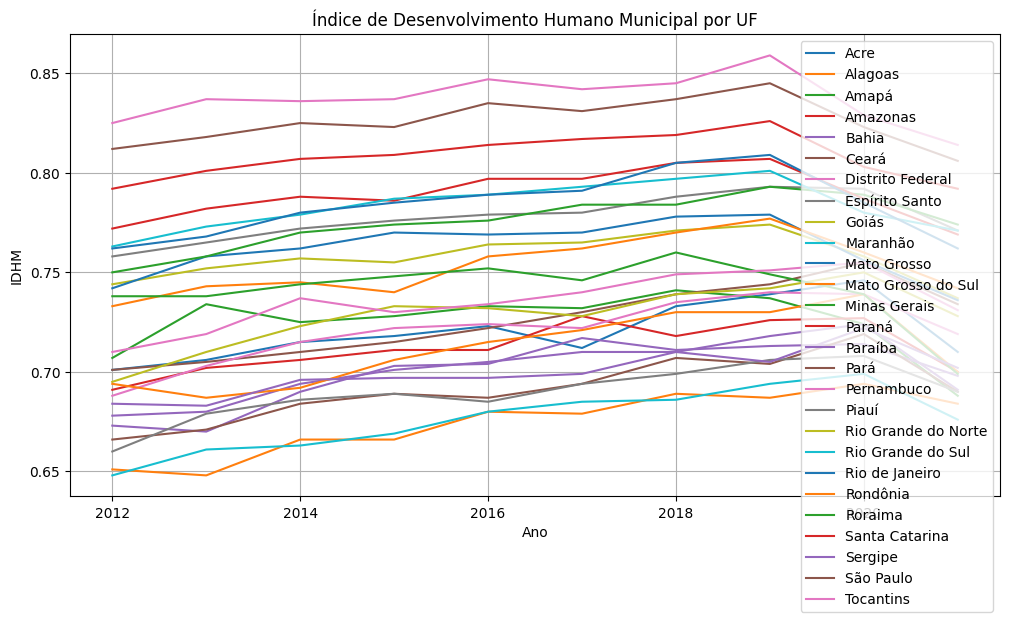

In [28]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_dim_soc_idh.groupby('NOME'):
    plt.plot(dados_território['Ano'], dados_território['IDHM'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Índice de Desenvolvimento Humano Municipal por UF')
plt.xlabel('Ano')
plt.ylabel('IDHM')
plt.legend()
plt.grid(True)

plt.show()

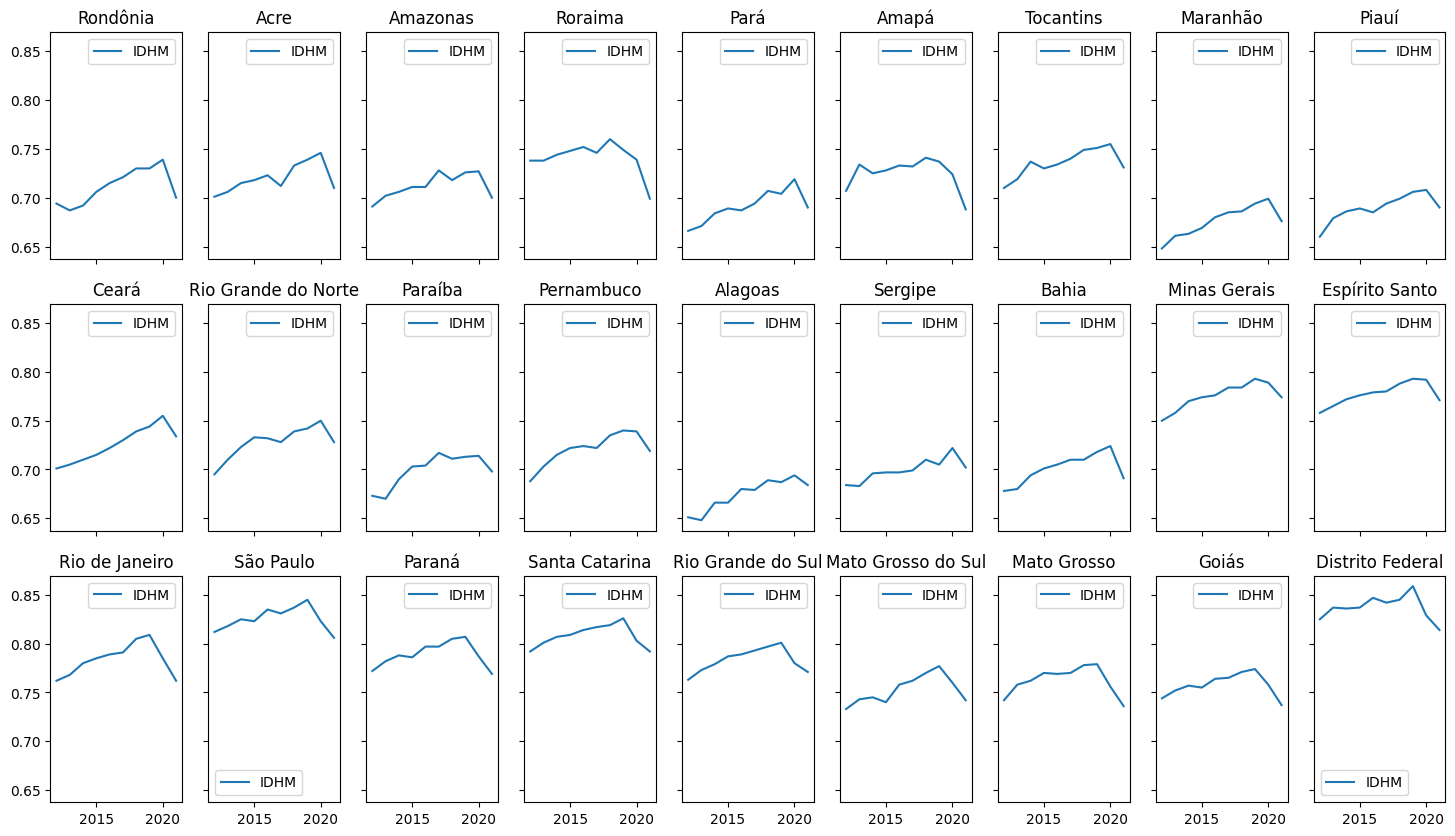

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter lista de unidades territoriais únicas
unidades_territoriais = df_dim_soc_idh['NOME'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = df_dim_soc_idh[df_dim_soc_idh['NOME'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='IDHM', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

## Gráficos do indicador - Esperança de vida ao nascer (IDH)

In [30]:
df_dim_soc_idh.head()

,AGREGACAO,NOME,IDHM,ESPVIDA,ANOSEST,Ano
10,UF,Rondônia,0.694,70.50,7.76,2012
11,UF,Acre,0.701,72.47,7.72,2012
12,UF,Amazonas,0.691,70.85,8.63,2012
13,UF,Roraima,0.738,70.10,9.59,2012
14,UF,Pará,0.666,71.23,7.60,2012


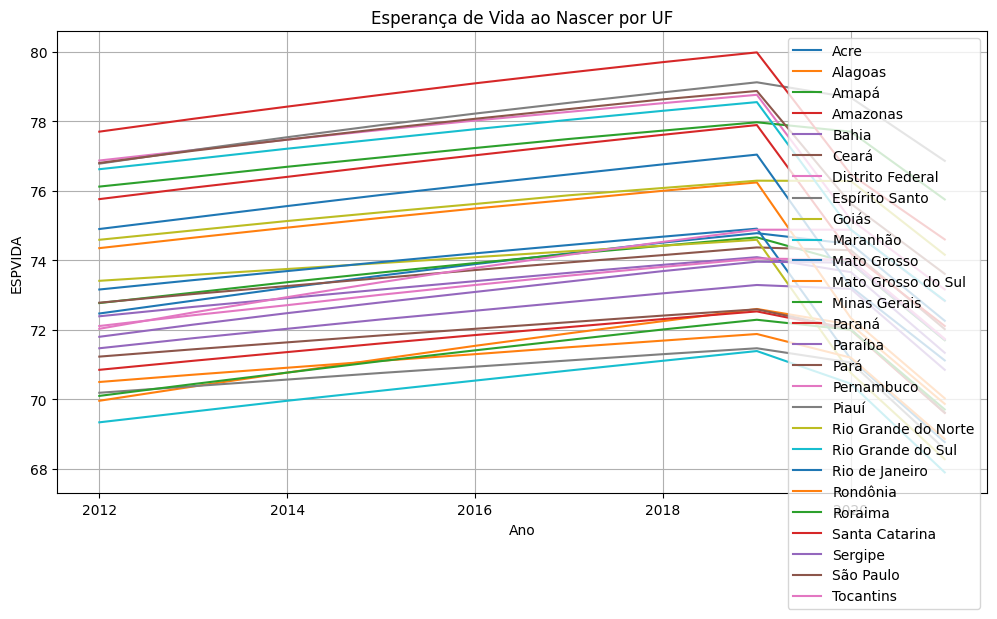

In [31]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_dim_soc_idh.groupby('NOME'):
    plt.plot(dados_território['Ano'], dados_território['ESPVIDA'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Esperança de Vida ao Nascer por UF')
plt.xlabel('Ano')
plt.ylabel('ESPVIDA')
plt.legend()
plt.grid(True)

plt.show()

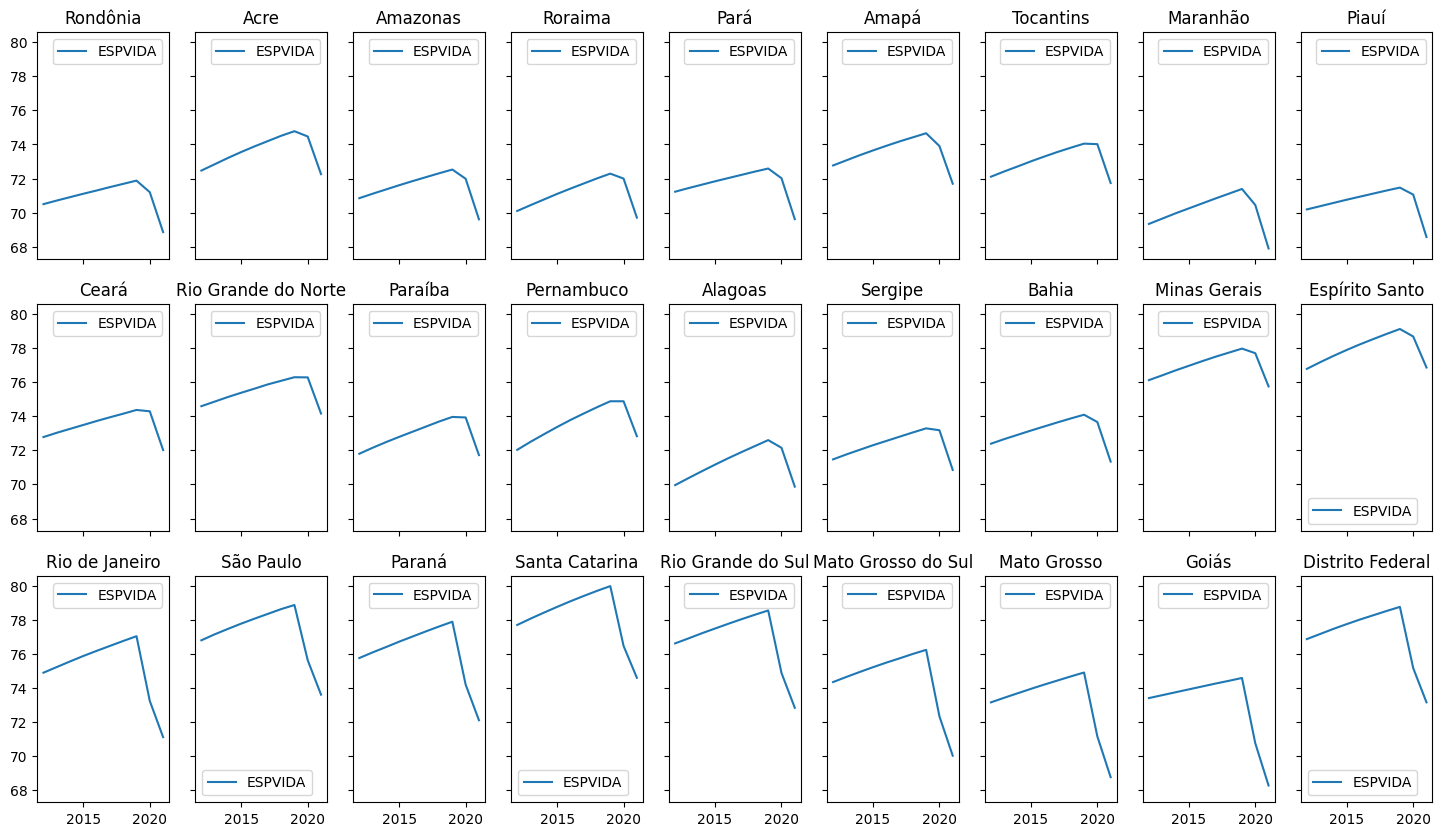

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter lista de unidades territoriais únicas
unidades_territoriais = df_dim_soc_idh['NOME'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = df_dim_soc_idh[df_dim_soc_idh['NOME'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='ESPVIDA', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

## Gráficos do indicador - Média de anos de estudo (IDH)

In [33]:
df_dim_soc_idh.head()

,AGREGACAO,NOME,IDHM,ESPVIDA,ANOSEST,Ano
10,UF,Rondônia,0.694,70.50,7.76,2012
11,UF,Acre,0.701,72.47,7.72,2012
12,UF,Amazonas,0.691,70.85,8.63,2012
13,UF,Roraima,0.738,70.10,9.59,2012
14,UF,Pará,0.666,71.23,7.60,2012


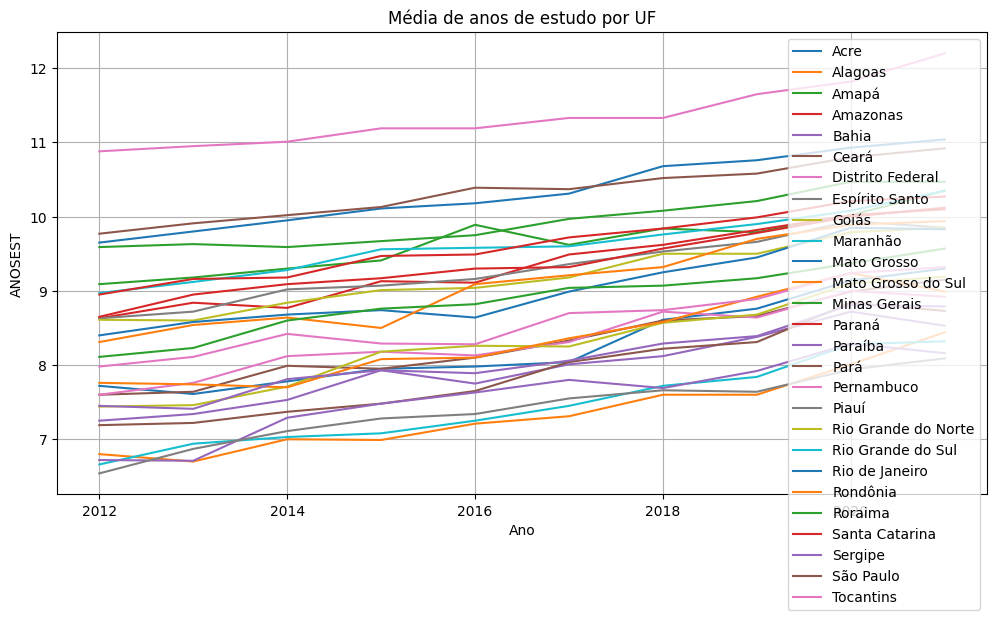

In [34]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_dim_soc_idh.groupby('NOME'):
    plt.plot(dados_território['Ano'], dados_território['ANOSEST'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Média de anos de estudo por UF')
plt.xlabel('Ano')
plt.ylabel('ANOSEST')
plt.legend()
plt.grid(True)

plt.show()

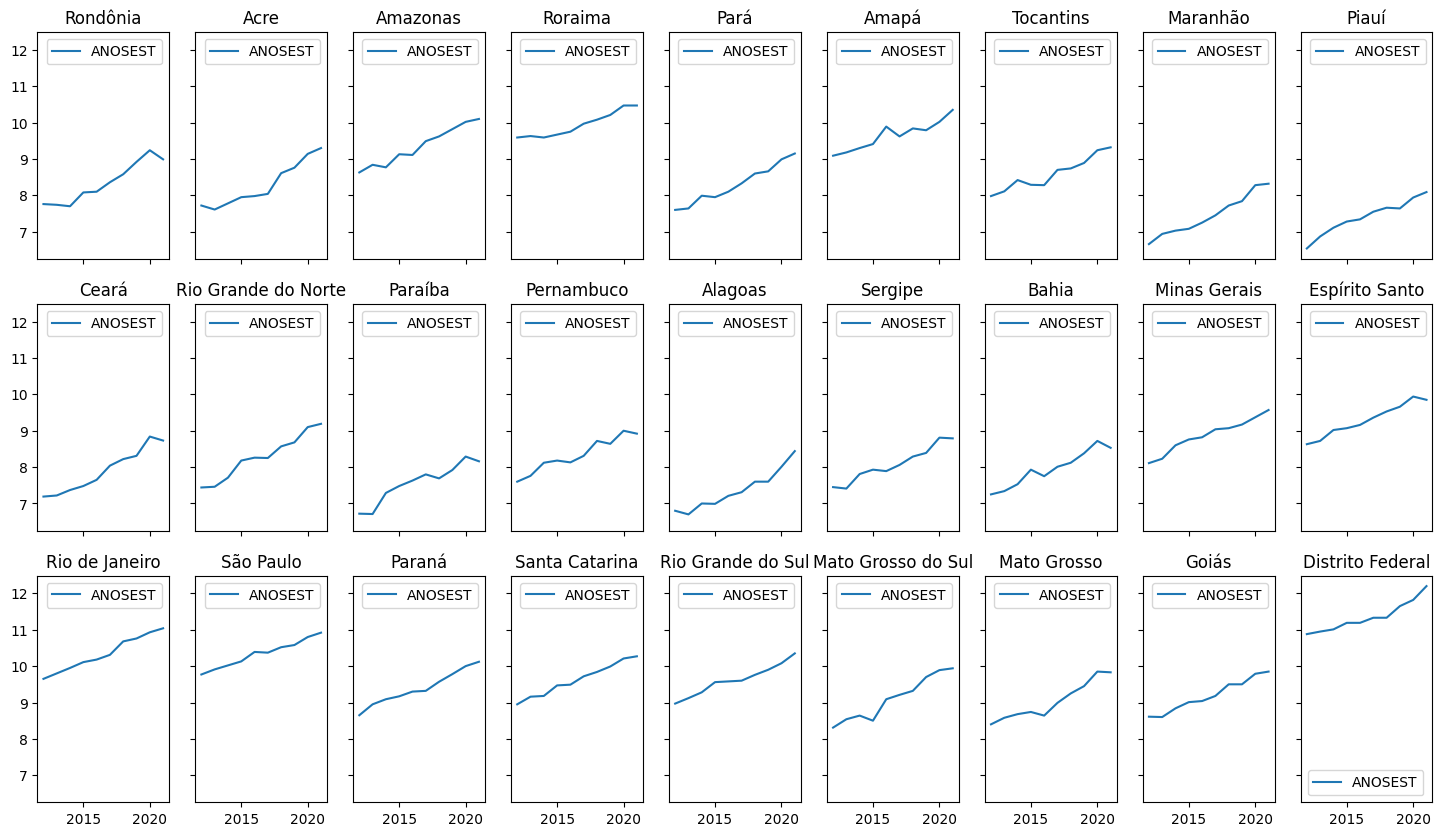

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter lista de unidades territoriais únicas
unidades_territoriais = df_dim_soc_idh['NOME'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = df_dim_soc_idh[df_dim_soc_idh['NOME'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='ANOSEST', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

## Análise do indicador do índice de GINI

In [36]:
df_mul_siafi_ibge.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'P

In [37]:
df_dim_eco_gini = df_mul_siafi_ibge.drop(columns=['IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M'])

In [38]:
df_dim_eco_gini.head()

,ANO,AGREGACAO,CODIGO,NOME,GINI
0,2012,BRASIL,NaN,NaN,0.540
1,2013,BRASIL,NaN,NaN,0.532
2,2014,BRASIL,NaN,NaN,0.526
3,2015,BRASIL,NaN,NaN,0.524
4,2016,BRASIL,NaN,NaN,0.537


In [39]:
df_dim_eco_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        490 non-null    int64  
 1   AGREGACAO  490 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   GINI       490 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.3+ KB


In [40]:
df_dim_eco_gini['ANO'] = pd.to_datetime(df_dim_eco_gini['ANO'], format='%Y')

In [41]:
df_dim_eco_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ANO        490 non-null    datetime64[ns]
 1   AGREGACAO  490 non-null    object        
 2   CODIGO     480 non-null    float64       
 3   NOME       480 non-null    object        
 4   GINI       490 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 19.3+ KB


In [42]:
import pandas as pd

# Extrair o ano da coluna "Referência"
df_dim_eco_gini['Ano'] = df_dim_eco_gini['ANO'].dt.year


In [43]:
df_dim_eco_gini.head()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
0,2012-01-01,BRASIL,NaN,NaN,0.540,2012
1,2013-01-01,BRASIL,NaN,NaN,0.532,2013
2,2014-01-01,BRASIL,NaN,NaN,0.526,2014
3,2015-01-01,BRASIL,NaN,NaN,0.524,2015
4,2016-01-01,BRASIL,NaN,NaN,0.537,2016


In [44]:
df_dim_eco_gini = df_dim_eco_gini.dropna(how='any')
df_dim_eco_gini.tail()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
485,2021-01-01,RM_RIDE,41.0,Região Metropolitana de Curitiba (PR),0.488,2021
486,2021-01-01,RM_RIDE,42.0,Região Metropolitana de Florianópolis (SC),0.484,2021
487,2021-01-01,RM_RIDE,43.0,Região Metropolitana de Porto Alegre (RS),0.491,2021
488,2021-01-01,RM_RIDE,51.0,Região Metropolitana de Vale do Rio Cuiabá (MT),0.484,2021
489,2021-01-01,RM_RIDE,52.0,Região Metropolitana de Goiânia (GO),0.500,2021


In [45]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_dim_eco_gini = df_dim_eco_gini[~df_dim_eco_gini['AGREGACAO'].str.contains('RM_RIDE')]

In [46]:
df_dim_eco_gini.tail()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
275,2021-01-01,UF,43.0,Rio Grande do Sul,0.468,2021
276,2021-01-01,UF,50.0,Mato Grosso do Sul,0.496,2021
277,2021-01-01,UF,51.0,Mato Grosso,0.461,2021
278,2021-01-01,UF,52.0,Goiás,0.467,2021
279,2021-01-01,UF,53.0,Distrito Federal,0.566,2021


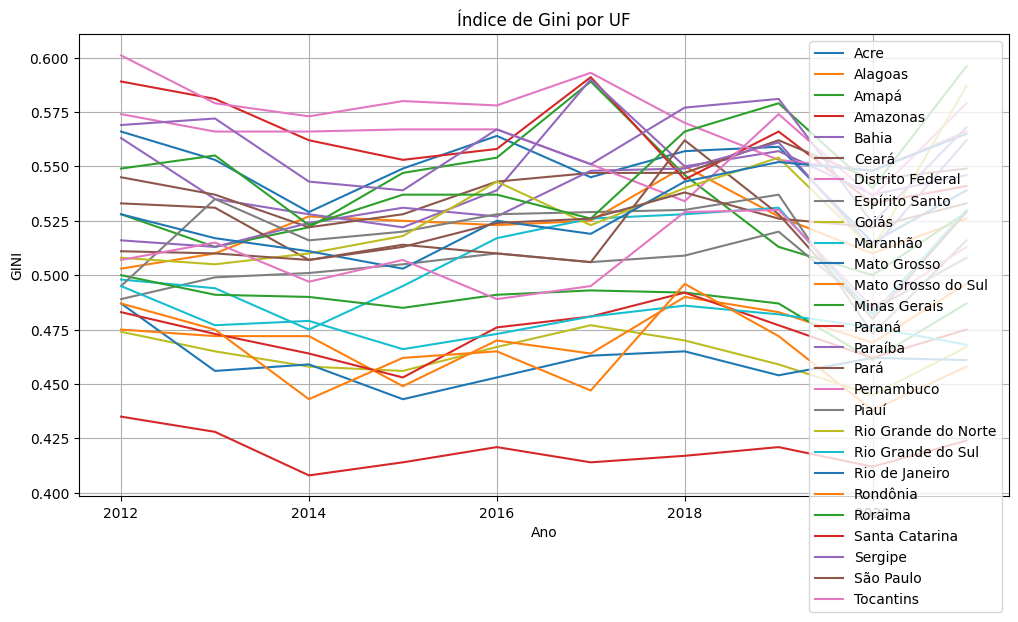

In [47]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_dim_eco_gini.groupby('NOME'):
    plt.plot(dados_território['Ano'], dados_território['GINI'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Índice de Gini por UF')
plt.xlabel('Ano')
plt.ylabel('GINI')
plt.legend()
plt.grid(True)

plt.show()

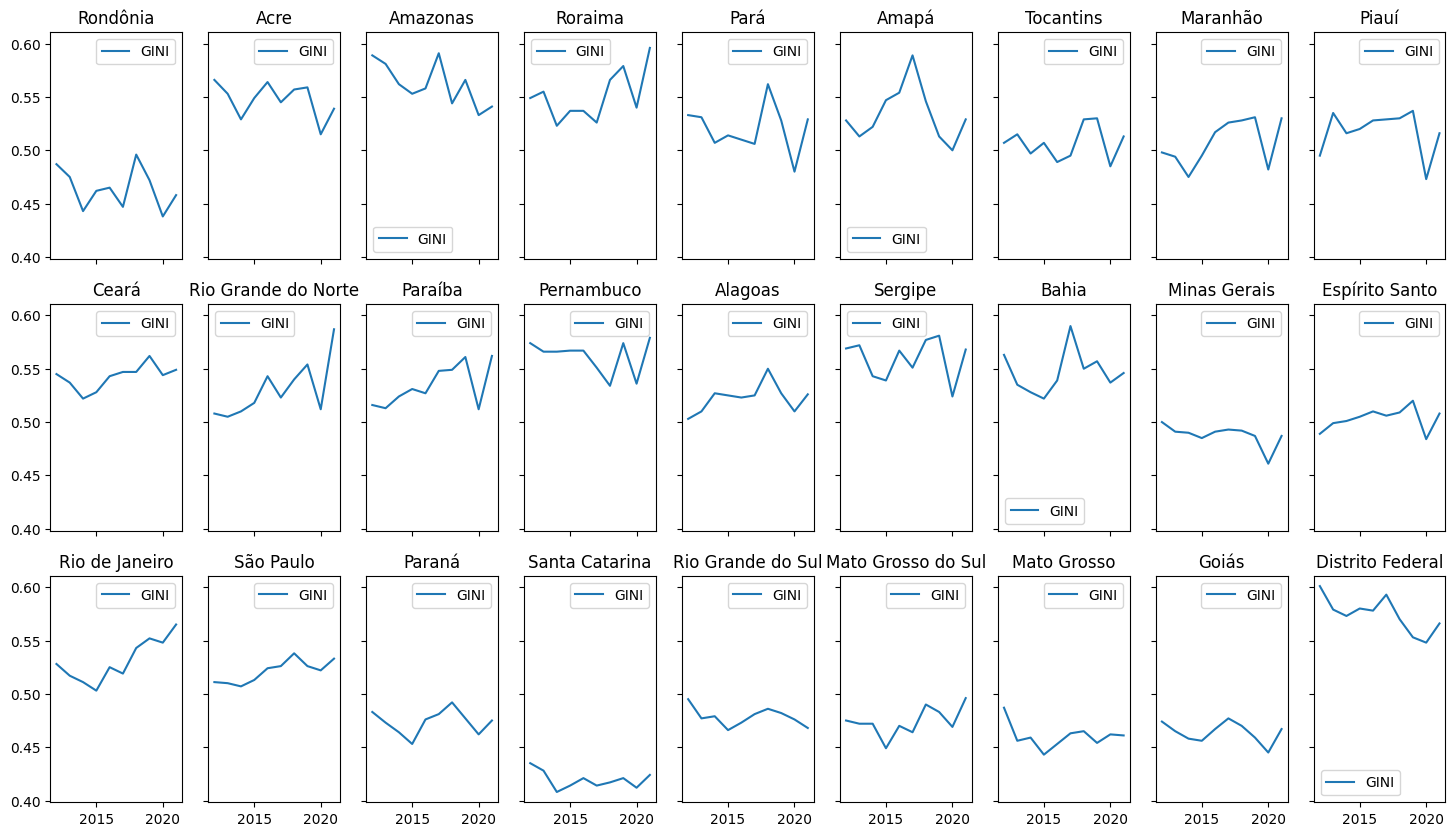

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter lista de unidades territoriais únicas
unidades_territoriais = df_dim_eco_gini['NOME'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = df_dim_eco_gini[df_dim_eco_gini['NOME'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='GINI', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

# Indicador relacionado a Estimativas Anuais de Emissões de Gases de Efeito Estufa

In [50]:
arquivo2 = "sirene_gee.xlsx"

caminho_completo2 = os.path.abspath(arquivo2)
print("O caminho completo para o arquivo é:", caminho_completo2)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\sirene_gee.xlsx


In [53]:
df_sirene_gee = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\sirene_gee.xlsx')

In [54]:
df_sirene_gee.head()

,CO₂e (GWP SAR)\n(Gg),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Rondônia,115564.095796,85520.721635,110961.098075,121666.692263,120593.662500,292540.834543,133543.627309,104044.116848,104371.445959,...,107511.636708,68412.360124,12255.858775,8170.725169,39325.606333,33516.040370,44388.299464,26821.871491,52857.366410,78812.645280
1,Acre,35149.152230,23851.485395,31297.859883,34511.967875,33980.702209,86888.761685,24122.158131,18605.390340,31824.786826,...,8588.698625,17610.355608,5595.373404,16375.660522,9574.538609,12066.651414,4659.277905,12305.099765,8758.332063,18319.260922
2,Amazonas,35754.777398,18333.821824,19966.505356,4866.225960,265.008063,74086.798294,-2547.209088,-31277.630304,-28082.501960,...,-55289.049384,-56509.409736,-91509.181544,-75381.629655,-104310.210503,-103213.845438,-98929.628607,-105226.767656,-89060.341886,-56224.519261
3,Roraima,5085.069935,3118.771300,-6235.135630,-5487.526462,-5569.828598,5776.767453,4853.427007,1998.072654,5501.887529,...,-1834.990896,14929.833009,-13899.506361,-5971.891159,-10773.143786,-12054.317792,-8279.018972,-4049.081348,-9210.205747,-5155.762693
4,Pará,224556.936511,166672.536383,207031.030640,226250.093045,218596.740122,573722.923480,421608.888267,259343.810912,390150.300201,...,349498.652965,358687.478036,222106.721283,173680.003505,128961.617520,19213.318279,71462.566668,31793.788004,56755.266176,130443.585372


In [57]:
df_sirene_gee.columns

Index(['CO₂e (GWP SAR)\n(Gg)',                   1990,                   1991,
                         1992,                   1993,                   1994,
                         1995,                   1996,                   1997,
                         1998,                   1999,                   2000,
                         2001,                   2002,                   2003,
                         2004,                   2005,                   2006,
                         2007,                   2008,                   2009,
                         2010,                   2011,                   2012,
                         2013,                   2014,                   2015,
                         2016],
      dtype='object')

In [65]:
df_sirene_gee = df_sirene_gee.melt(id_vars=['CO₂e (GWP SAR)\n(Gg)'], var_name='Ano', value_name='Emissões_CO2e')
df_sirene_gee.tail()

,CO₂e (GWP SAR)\n(Gg),Ano,Emissões_CO2e
751,Mato Grosso do Sul,2016,3298.991534
752,Mato Grosso,2016,131625.508397
753,Goiás,2016,11960.665520
754,Distrito Federal,2016,-226.442493
755,Brasil,2016,397357.040351


In [66]:
df_sirene_gee = df_sirene_gee.rename(columns={'CO₂e (GWP SAR)\n(Gg)': 'Estado'})

In [67]:
df_sirene_gee.columns

Index(['Estado', 'Ano', 'Emissões_CO2e'], dtype='object')

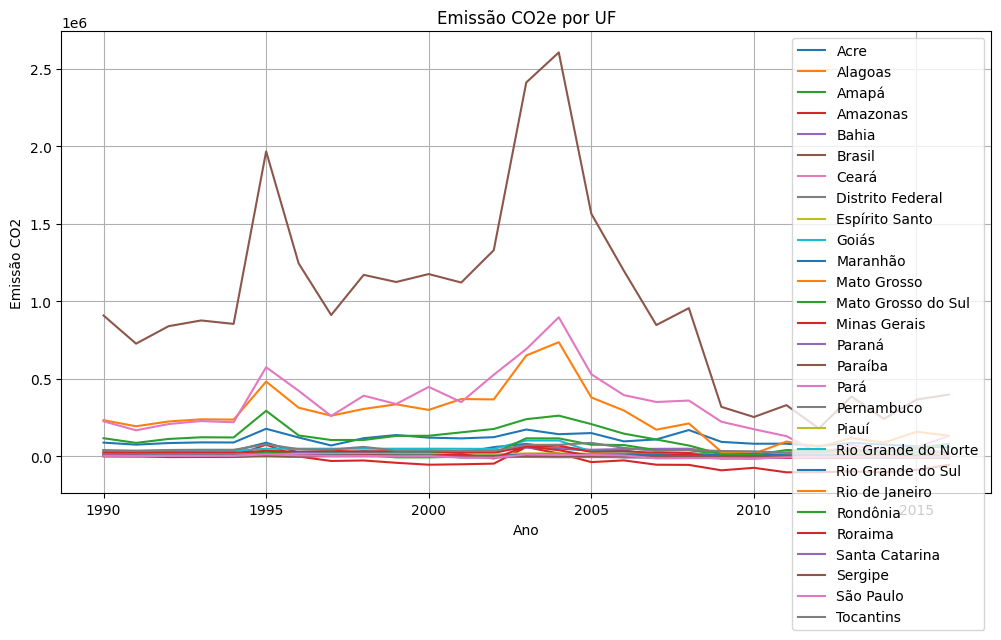

In [68]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_sirene_gee.groupby('Estado'):
    plt.plot(dados_território['Ano'], dados_território['Emissões_CO2e'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Emissão CO2e por UF')
plt.xlabel('Ano')
plt.ylabel('Emissão CO2')
plt.legend()
plt.grid(True)

plt.show()

In [69]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_sirene_gee_est = df_sirene_gee[~df_sirene_gee['Estado'].str.contains('Brasil')]

In [70]:
df_sirene_gee_est.head()

,Estado,Ano,Emissões_CO2e
0,Rondônia,1990,115564.095796
1,Acre,1990,35149.152230
2,Amazonas,1990,35754.777398
3,Roraima,1990,5085.069935
4,Pará,1990,224556.936511


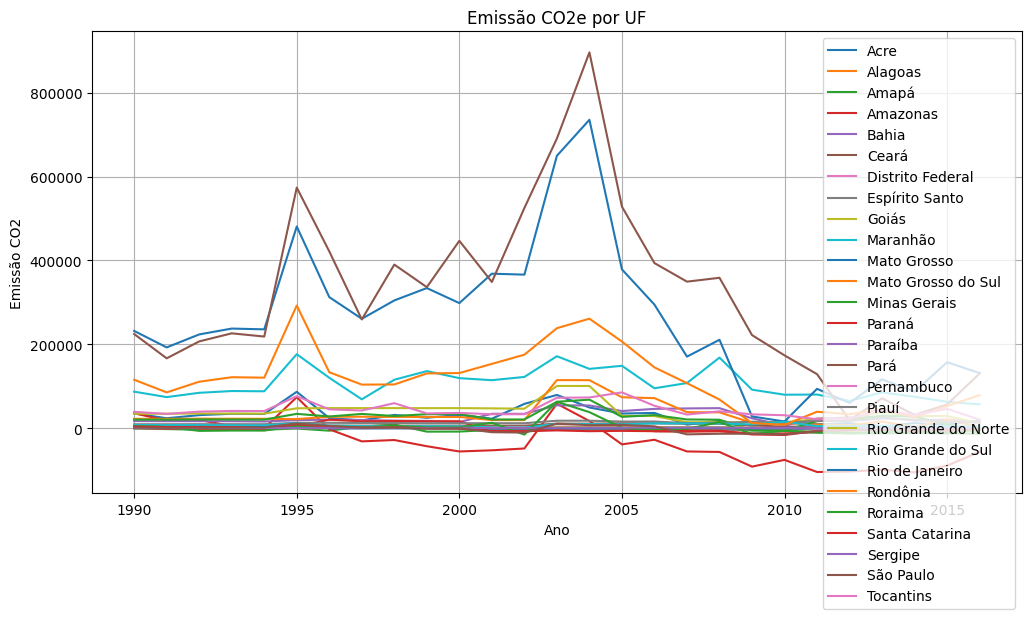

In [72]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_sirene_gee_est.groupby('Estado'):
    plt.plot(dados_território['Ano'], dados_território['Emissões_CO2e'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Emissão CO2e por UF')
plt.xlabel('Ano')
plt.ylabel('Emissão CO2')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Obter lista de unidades territoriais únicas
unidades_territoriais =  df_sirene_gee_est['Estado'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data =  df_sirene_gee_est[df_sirene_gee_est['Estado'] == territorial]
   
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='CO2', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()